<a href="https://colab.research.google.com/github/IlonaAst/Data-Science/blob/main/Data_Science_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%BE_%D0%BA%D1%83%D1%80%D1%81%D0%B5_%D0%B1%D0%B8%D1%82%D0%BA%D0%BE%D0%B8%D0%BD%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
bitcoin = pd.read_csv("/content/BTCUSD_daily.csv", index_col=0)
bitcoin.date = pd.to_datetime(bitcoin.date)  # Привести колонку date к формату datetime

In [ ]:
bitcoin.describe()

,open,high,low,close,Volume USD,Volume BTC
count,2652.000000,2652.000000,2652.000000,2652.000000,2.652000e+03,2652.000000
mean,12817.097939,13186.267542,12399.817371,12828.207655,1.497664e+08,18381.609947
std,16824.413997,17289.418026,16283.433540,16826.150324,2.171489e+08,20526.790610
min,212.630000,223.200000,162.000000,212.630000,0.000000e+00,0.000000
25%,756.692500,773.582500,743.492500,766.082500,1.362017e+07,5678.644934
50%,6753.050000,6939.300000,6602.450000,6756.100000,6.404094e+07,10971.855000
75%,11473.000000,11791.500000,11124.500000,11478.250000,2.004097e+08,23124.732500
max,67526.000000,68958.000000,66326.000000,67526.000000,2.491339e+09,266768.610000


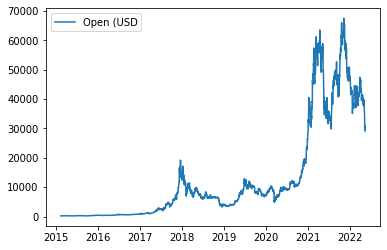

In [ ]:
import matplotlib.pyplot as plt
plt.plot(bitcoin.date, bitcoin.open, label="Open (USD")
plt.legend()  # Отобразить легенду
plt.show()  # Отобразить график

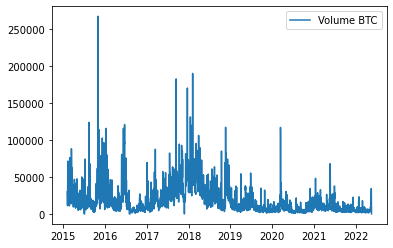

In [ ]:
plt.plot(bitcoin.date, bitcoin["Volume BTC"], label="Volume BTC")
plt.legend()  # Отобразить легенду
plt.show()  # Отобразить график

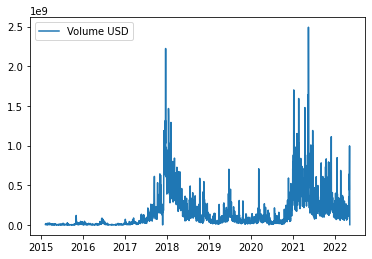

In [ ]:
plt.plot(bitcoin.date, bitcoin["Volume USD"], label="Volume USD")
plt.legend()  # Отобразить легенду
plt.show()  # Отобразить график

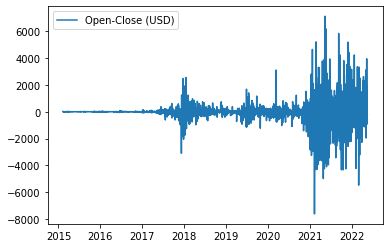

In [ ]:
plt.plot(bitcoin.date, bitcoin.open-bitcoin.close, label="Open-Close (USD)")
plt.legend()  # Отобразить легенду
plt.show()  # Отобразить график

In [ ]:
bitcoin["openclose"] = bitcoin.open - bitcoin.close  # Feature Engineering = придумывание новых колонок на основе старых
bitcoin["highlow"] = bitcoin.high - bitcoin.low   
bitcoin["open_high"] = bitcoin["openclose"] / bitcoin["highlow"]

bitcoin["month"] = bitcoin.date.dt.month
bitcoin["year"] = bitcoin.date.dt.year
bitcoin["weekday"] = bitcoin.date.dt.weekday

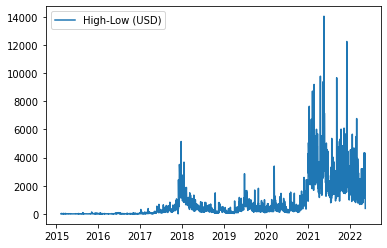

In [ ]:
plt.plot(bitcoin.date, bitcoin.high-bitcoin.low, label="High-Low (USD)")
plt.legend()  # Отобразить легенду
plt.show()  # Отобразить график

In [ ]:
(bitcoin.high-bitcoin.low).max()

14037.0

In [ ]:
bitcoin.date

0      2015-02-09
1      2015-02-10
2      2015-02-11
3      2015-02-12
4      2015-02-13
          ...    
2647   2022-05-10
2648   2022-05-11
2649   2022-05-12
2650   2022-05-13
2651   2022-05-14
Name: date, Length: 2652, dtype: datetime64[ns]

In [ ]:
bitcoin.groupby("weekday")["Volume BTC"].mean()

weekday
0    18387.442268
1    19291.510763
2    20188.969945
3    20206.262647
4    20332.660632
5    14981.140207
6    15275.086537
Name: Volume BTC, dtype: float64

In [ ]:
# Средняя цена открытия за последние 7 дней
# Скользящие окна
bitcoin["open_mean_7d"] = bitcoin["open"].shift(1).rolling(window=7).mean()
bitcoin["max_volume_btc_30d"] = bitcoin["Volume BTC"].shift(1).rolling(window=30).max()
bitcoin["min_close_14d"] = bitcoin["close"].shift(1).rolling(window=14).min()
bitcoin[["date", "open", "open_mean_7d"]].head(14)

,date,open,open_mean_7d
0,2015-02-09,224.22,NaN
1,2015-02-10,220.61,NaN
2,2015-02-11,220.96,NaN
3,2015-02-12,219.19,NaN
4,2015-02-13,222.39,NaN
5,2015-02-14,236.13,NaN
6,2015-02-15,257.00,NaN
7,2015-02-16,234.14,228.642857
8,2015-02-17,236.78,230.060000
9,2015-02-18,242.87,232.370000


In [ ]:
for day in range(1,8):
  bitcoin[f"close_{day}d"] = bitcoin["close"].shift(day)

In [ ]:
# Подготовка данных
# Разворачивание категориальных колонок
bitcoin = pd.get_dummies(bitcoin, columns=["year", "month", "weekday"])

# Удаляем лишние колонки
bitcoin.drop("date", axis=1, inplace=True)
bitcoin.drop("symbol", axis=1, inplace=True)

# Удаляем дишние строки
# bitcoin.dropna(inplace=True)

# ИЛИ заполнить лишние строки
bitcoin.fillna(method="backfill", inplace=True)

In [ ]:
# Предсказать close

bitcoin["target"] = bitcoin["close"].shift(-1)

bitcoin[["open", "close", "high", "low", "target"]].head()


,open,close,high,low,target
0,224.22,220.61,225.00,215.40,220.96
1,220.61,220.96,223.88,214.00,219.19
2,220.96,219.19,224.40,218.10,222.60
3,219.19,222.60,223.20,217.87,236.00
4,222.39,236.00,241.76,221.46,258.12


In [ ]:
X = bitcoin[:-1].drop("target", axis=1)
y = bitcoin[:-1].target

In [ ]:
# Разделим данные на две части
# Тренировочную (обучающую) = Train Set, модель на ней обучается, учебник (Х_train, y_train)
# Тестовую (проверочную) = Test Set, проверяем качество модели, экзамен (Х_test) => y_pred == y_true 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# random_state=42 Генерирует одинаковые произвольные числа на разных компьютерах

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error

In [ ]:
linreg = LinearRegression()
model = linreg
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train) # Насколько хорошо модель усвоила учебник
test_score = model.score(X_test, y_test) # асколько хорошо модель сдала экзамен
y_pred = model.predict(X_test)

print("train_score = ", train_score)
print("test_score = ", test_score)
print("max_error = ", max_error(y_pred, y_test))
print("mean_absolute_error = ", mean_absolute_error(y_pred, y_test))
print("mean_squared_error = ", mean_squared_error(y_pred, y_test))

train_score =  0.997868691008567
test_score =  0.9971815850498759
max_error =  6667.25776771213
mean_absolute_error =  430.4002047514986
mean_squared_error =  753882.9896639865


In [ ]:
model = RandomForestRegressor(n_estimators=5000)
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train) # Насколько хорошо модель усвоила учебник
test_score = model.score(X_test, y_test) # асколько хорошо модель сдала экзамен
y_pred = model.predict(X_test)

print("train_score = ", train_score)
print("test_score = ", test_score)
print("max_error = ", max_error(y_pred, y_test))
print("mean_absolute_error = ", mean_absolute_error(y_pred, y_test))
print("mean_squared_error = ", mean_squared_error(y_pred, y_test))

train_score =  0.999645237275988
test_score =  0.9965606198411426
max_error =  7633.467421912763
mean_absolute_error =  434.30638857575855
mean_squared_error =  919981.7069648369


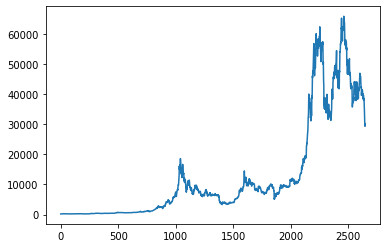

In [ ]:
plt.plot(model.predict(X))

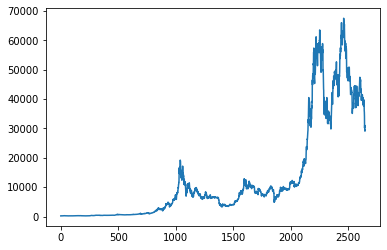

In [ ]:
y.plot()

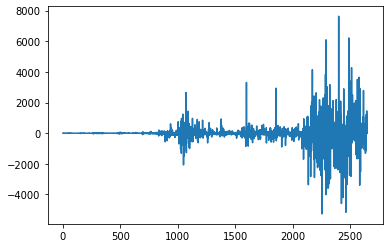

In [ ]:
plt.plot(model.predict(X) - y)

In [ ]:
model.feature_importances_

array([3.51573498e-02, 1.70718132e-01, 4.57936941e-02, 2.26790515e-01,
       6.33933635e-05, 5.94843155e-05, 7.80129777e-05, 9.23388426e-05,
       8.42092514e-05, 8.56300760e-02, 4.89173283e-05, 6.63326401e-02,
       3.84358505e-02, 3.34572092e-02, 2.17577726e-02, 8.16308121e-03,
       6.13045973e-02, 5.54118299e-02, 1.50283346e-01, 7.71420966e-11,
       9.42002257e-10, 1.72962365e-06, 1.21699171e-06, 8.11662162e-07,
       2.17023109e-06, 9.55615857e-05, 4.83209054e-06, 4.77448164e-06,
       2.57158587e-05, 4.89025630e-06, 2.25624985e-05, 1.34745160e-05,
       3.29908775e-06, 2.73248745e-06, 8.24906268e-06, 6.85049800e-06,
       3.72395339e-06, 3.25604942e-06, 8.74137244e-06, 9.40651282e-06,
       1.82350725e-05, 2.77713663e-05, 1.28813974e-05, 1.27790670e-05,
       6.00647137e-06, 3.58760115e-05])

In [ ]:
model.feature_names_in_

array(['open', 'high', 'low', 'close', 'Volume USD', 'Volume BTC',
       'openclose', 'highlow', 'open_high', 'open_mean_7d',
       'max_volume_btc_30d', 'min_close_14d', 'close_1d', 'close_2d',
       'close_3d', 'close_4d', 'close_5d', 'close_6d', 'close_7d',
       'year_2015', 'year_2016', 'year_2017', 'year_2018', 'year_2019',
       'year_2020', 'year_2021', 'year_2022', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6'], dtype=object)

In [ ]:
len(model.feature_names_in_)

46

In [ ]:
X.shape

(2651, 46)

In [ ]:
pd.DataFrame(data=[model.feature_importances_], columns=model.feature_names_in_).T.sort_values(by=0, ascending=False)

,0
close,2.267905e-01
high,1.707181e-01
close_7d,1.502833e-01
open_mean_7d,8.563008e-02
min_close_14d,6.633264e-02
close_5d,6.130460e-02
close_6d,5.541183e-02
low,4.579369e-02
close_1d,3.843585e-02
open,3.515735e-02


In [ ]:
linreg.coef_

array([ 1.27443291e+00, -9.33927933e-02, -3.09717892e-02,  1.12735783e+00,
        1.45382126e-07,  6.69032497e-04,  1.47075082e-01, -5.20346367e-02,
       -2.79639795e+01,  2.03114788e-01, -5.26384529e-04, -8.11503072e-02,
       -1.26468926e+00, -3.79155902e-02, -7.05839702e-03, -3.55184167e-02,
        1.56710270e-02, -1.57201231e-01,  5.60014220e-02, -4.01851532e+02,
       -3.96462487e+02, -2.96100656e+02, -2.40014129e+02, -1.88731994e+02,
       -7.60194001e+01,  9.13346578e+02,  6.85833620e+02, -5.40445495e+01,
        1.06191479e+02,  1.86140788e+00,  1.16045305e+01, -2.01721030e+02,
       -1.03503119e+02, -4.66011463e+00, -5.82086107e+00,  4.23809176e+00,
        1.26463926e+02,  5.90299073e+01,  6.03603327e+01,  2.24532727e+00,
        3.01861152e+01, -8.89684192e+01,  1.98073842e+01,  3.20074544e+01,
       -2.73552453e+01,  3.20773835e+01])

In [ ]:
linreg.intercept_

428.17032562192253

In [ ]:
pd.DataFrame(data=[linreg.coef_], columns=linreg.feature_names_in_).T.sort_values(by=0, ascending=False)

,0
year_2021,9.133466e+02
year_2022,6.858336e+02
month_10,1.264639e+02
month_2,1.061915e+02
month_12,6.036033e+01
month_11,5.902991e+01
weekday_6,3.207738e+01
weekday_4,3.200745e+01
weekday_1,3.018612e+01
weekday_3,1.980738e+01


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# GridSearch - поиск по сетке (гиперпараметров)
estimator = model # RandomForestRegressor
param_grid = {
    "n_estimators": [50, 100, 250],
    "min_samples_split": [2,3,4],
    "max_depth": [5,100]
}
gs = GridSearchCV(estimator, param_grid, scoring = "neg_mean_absolute_error", cv=3)

In [ ]:
gs.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_estimators=5000),
             param_grid={'max_depth': [5, 100], 'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 250]},
             scoring='neg_mean_absolute_error')

In [ ]:
import pickle # Сохранить обученную модель

In [ ]:
with open("linreg.model", "wb") as modelfile:
  pickle.dump(linreg, modelfile)

In [ ]:
with open("linreg.model", "rb") as modelfile:
  loaded_model = pickle.load(modelfile)
  print(loaded_model)

LinearRegression()
